In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

In [2]:
def C_converge(C_t,d,tau,F_max):

    k = 0 

    while k < 100:

        Ks = (4*C_t - 1)/(4*C_t - 4) + 0.675/C_t

        C_p = tau*np.pi*d**2/(8*F_max*Ks)

        error = ((C_p-C_t)**2)**0.5

        C_t = (C_p+C_t)/2

        if error <= C_t*0.01:
            return C_t

In [3]:
# constantes

Su = 1250e6
Su_lim = 0.80
Su_vida_inf = 0.44
Sy_lim = 0.65
F_min = 250
F_max = 500
Fs = 1.1 * F_max
delta_p = 25e-3
G = 79e9
E = 207e9
rho = 7700


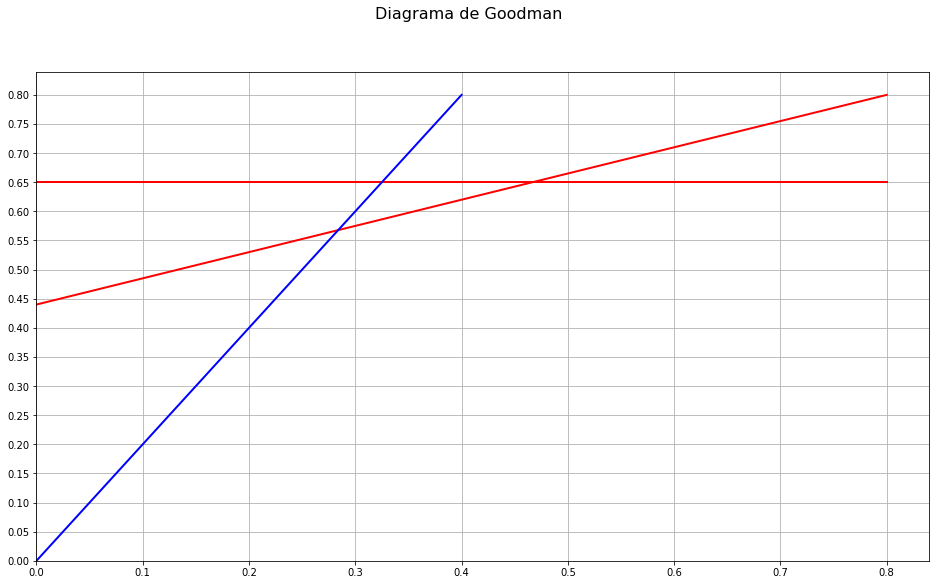

In [4]:
# plotagem diagrama de goodman

fig = plt.figure(figsize=[16, 9])
fig.suptitle('Diagrama de Goodman modificado', fontsize=16)

linha_sobrecarga_1 = np.array(
    ([0,Su_vida_inf],
    [Su_lim,Su_lim])
) 

linha_sobrecarga_2 = np.array(
    ([0,Sy_lim],
    [Su_lim,Sy_lim])
) 

linha_carga = np.array(
    ([0,0],
    [Su_lim*(F_min/F_max),Su_lim])
)


# Plotando 2D

ax = fig.add_subplot(1, 1, 1)

ax.plot(linha_sobrecarga_1[:,0], linha_sobrecarga_1[:,1], 'r', linewidth=2)
ax.plot(linha_sobrecarga_2[:,0], linha_sobrecarga_2[:,1], 'r', linewidth=2)
ax.plot(linha_carga[:,0], linha_carga[:,1], 'b', linewidth=2)

ax.set_xlim(0)
ax.set_ylim(0)
ax.locator_params(axis='y', nbins=20)
ax.grid()

plt.show()


In [5]:
# encontrando tensão limite

tensao_max_teorico = 0.52 * Su

f_seguranca = 0.1

f_mola_solida = 0.1

tensao_max = tensao_max_teorico/(1+f_seguranca)/(1+f_mola_solida)
print('{:.2e} MPa'.format(tensao_max/1e6))

5.37e+02 MPa


In [6]:
# estabelecendo um diãmetro alvo

C_t = 10

Kw = (4*C_t - 1)/(4*C_t - 4) + 0.615/C_t

d_alvo = (8*F_max*C_t*Kw/(np.pi*tensao_max))**0.5

print('{:.2e} mm'.format(d_alvo*1e3))


5.21e+00 mm


In [7]:
k = (F_max-F_min)/delta_p
k

10000.0

In [54]:
# iterando diâmetros para achar a melhor solução

d_mm_list = np.linspace(4,18,num=15,dtype=int)

C_list = []
D_list = []
Nt_list = []
Lf_D_list = []
delta_Lf_list = []
V_list = []
P_list = []
fn_list = []
d_list = []

for i,d_mm in enumerate(d_mm_list):

    d = d_mm*1e-3

    C = C_converge(C_t,d,tensao_max,F_max)

    D = C * d

    N = d * G/(8 * C**3 * k)

    N_t = N + 2

    Ls = N_t * d

    delta = Fs/k

    L_f = Ls + delta

    Lf_D = L_f/D

    delta_Lf = delta/L_f

    V = (np.pi * d **2 / 4) * 2*np.pi *D/2

    P = V * rho

    fn = 353e3*d/(N*D**2) * 60

    C_list.append(C)
    D_list.append(D)
    Nt_list.append(N_t)
    Lf_D_list.append(Lf_D)
    delta_Lf_list.append(delta_Lf)
    V_list.append(V)
    P_list.append(P)
    fn_list.append(fn)
    d_list.append(d)

df = pd.DataFrame(np.vstack((
        d_list,
        C_list,
        D_list,
        Nt_list,
        Lf_D_list,
        delta_Lf_list,
        V_list,
        P_list,
        fn_list
    )).T,columns=[
            'd',
            'C',
            'D',
            'Nt',
            'Lf/D',
            'delta/Lf',
            'V',
            'P',
            'fn'
        ])

df


,d,C,D,Nt,Lf/D,delta/Lf,V,P,fn
0,0.004,5.183055,0.020732,30.368715,8.512106,0.311659,8.184752e-07,0.006302,6.947918e+06
1,0.005,9.089688,0.045448,8.574461,2.153480,0.561957,2.803488e-06,0.021587,7.798262e+06
2,0.006,13.643828,0.081863,4.332811,0.989420,0.679039,7.271596e-06,0.055991,8.128728e+06
3,0.007,19.137260,0.133961,2.986270,0.566613,0.724601,1.619622e-05,0.124711,8.376692e+06
4,0.008,25.441376,0.203531,2.479739,0.367698,0.734922,3.214033e-05,0.247481,8.526081e+06
5,0.009,32.584411,0.293260,2.256892,0.256810,0.730295,5.861073e-05,0.451303,8.628071e+06
6,0.010,40.566833,0.405668,2.147919,0.188526,0.719150,1.000946e-04,0.770729,8.700815e+06
7,0.011,49.388901,0.543278,2.090166,0.143558,0.705202,1.621986e-04,1.248929,8.754530e+06
8,0.012,59.050764,0.708609,2.057550,0.112461,0.690169,2.517729e-04,1.938651,8.795325e+06
9,0.013,69.552513,0.904183,2.038154,0.090132,0.674880,3.770358e-04,2.903176,8.827037e+06


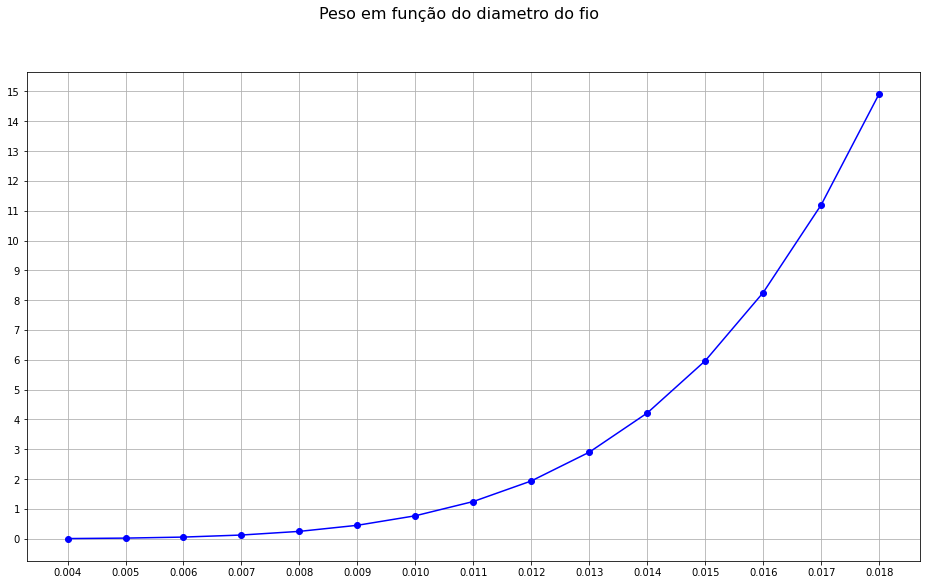

<Figure size 1152x648 with 0 Axes>

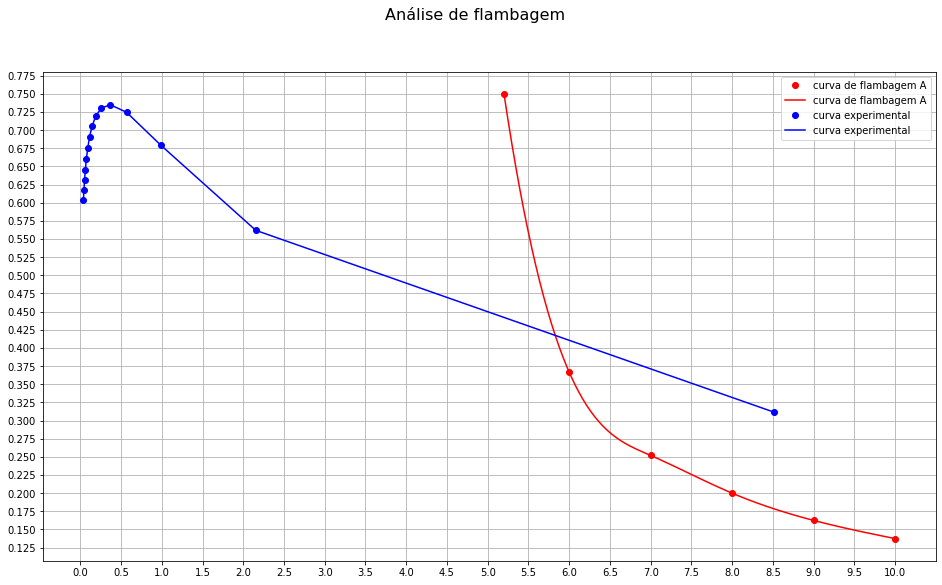

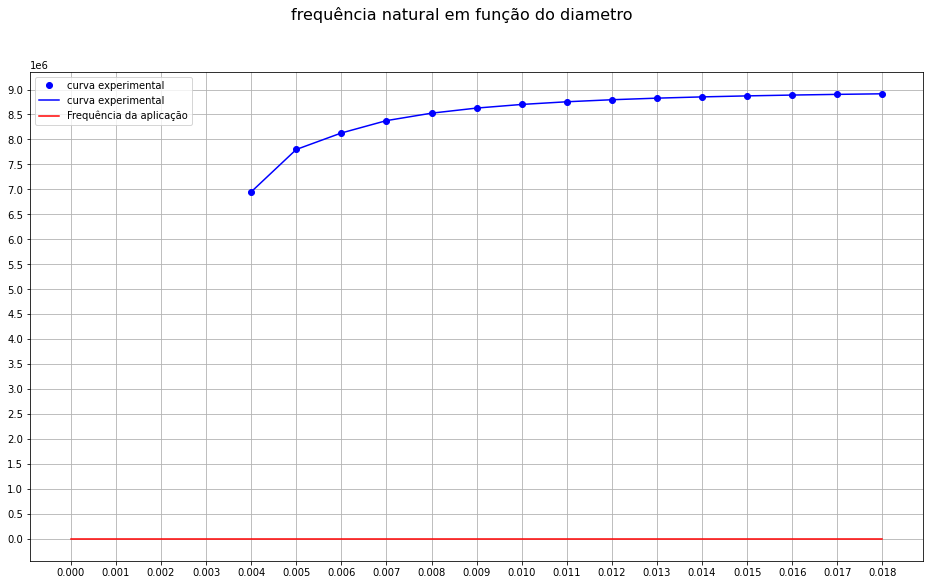

In [55]:
# Análise gráfica

# plotagem do peso em funcao do diametro

fig = plt.figure(figsize=[16, 9])
fig.suptitle('Peso em função do diametro do fio', fontsize=16)

# Plotando 2D

ax = fig.add_subplot(1, 1, 1)

ax.plot(d_list,
    df['P'],
    'o', 
    d_list, 
    df['P'], 
    '-',
    color='b',
)

ax.locator_params(axis='y', nbins=30)
ax.locator_params(axis='x', nbins=30)
ax.grid()

plt.show()

# análise de flambagem

fig = plt.figure(figsize=[16, 9])
fig.suptitle('Análise de flambagem', fontsize=16)


flambagem_seed = np.array((
    [5.2,0.75],
    [10,0.1375],
    [9,0.1625],
    [6,0.3667],
    [8,0.2],
    [7,0.252]
))

flambagem_eval = np.linspace(
    min(flambagem_seed[:,0]),
    max(flambagem_seed[:,0]),
    num=200
)

# Análise de flambagem

fig = plt.figure(figsize=[16, 9])
fig.suptitle('Análise de flambagem', fontsize=16)

# Plotando 2D

ax = fig.add_subplot(1, 1, 1)

f2 = interp1d(
    flambagem_seed[:,0], 
    flambagem_seed[:,1],
    kind='cubic'
)

curva_A = f2(flambagem_eval)   # use interpolation function returned by `interp1d`

ax.plot(flambagem_seed[:,0], 
    flambagem_seed[:,1], 
    'o', 
    flambagem_eval, 
    curva_A, 
    '-',
    color='r',
    label='curva de flambagem A'
)

ax.plot(df['Lf/D'],
    df['delta/Lf'], 
    'o', 
    df['Lf/D'],
    df['delta/Lf'],
    '-',
    color='b',
    label='curva experimental'
)

ax.locator_params(axis='y', nbins=30)
ax.locator_params(axis='x', nbins=30)
ax.grid()
ax.legend()

plt.show()

# Análise de frequencia natural

fig = plt.figure(figsize=[16, 9])
fig.suptitle('frequência natural em função do diametro', fontsize=16)

# Plotando 2D

ax = fig.add_subplot(1, 1, 1)

ax.plot(d_list,
    df['fn'],
    'o', 
    d_list, 
    df['fn'], 
    '-',
    color='b',
    label="curva experimental"
)

ax.plot([0,max(d_list)],
    [650,650],
    '-',
    color='r',
    label = 'Frequência da aplicação'
)

ax.locator_params(axis='y', nbins=30)
ax.locator_params(axis='x', nbins=30)
ax.grid()
ax.legend()

plt.show()